In [59]:
import numpy as np
import os
import sys
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras import backend as K
# from tensorflow.python.keras.layers import Dense
import matplotlib.pyplot as plt
print(tf.__version__)

2.8.0


In [60]:

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [61]:
IMAGE_SIZE = 256
CHANNELS = 3

In [62]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'Desktop/leafDetectionNew/finalDataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 70295 images belonging to 38 classes.


In [63]:
train_generator.class_indices


{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [64]:
class_names = list(train_generator.class_indices.keys())
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [65]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[5.8874577e-01 5.4560852e-01 5.3776538e-01]
  [5.8826095e-01 5.4512370e-01 5.3728056e-01]
  [5.8823532e-01 5.4509807e-01 5.3725493e-01]
  ...
  [4.0665746e-02 7.2502805e-04 1.3214763e-02]
  [2.9648563e-02 0.0000000e+00 2.1975813e-03]
  [2.7450982e-02 0.0000000e+00 0.0000000e+00]]

 [[5.9335357e-01 5.5021632e-01 5.4237318e-01]
  [5.9601998e-01 5.5288273e-01 5.4503959e-01]
  [5.9560430e-01 5.5246705e-01 5.4462391e-01]
  ...
  [4.0180936e-02 4.8262376e-04 1.2729954e-02]
  [2.8921349e-02 0.0000000e+00 1.4703684e-03]
  [2.7450982e-02 0.0000000e+00 0.0000000e+00]]

 [[5.5125970e-01 5.0812244e-01 5.0027925e-01]
  [5.5296528e-01 5.0982803e-01 5.0198489e-01]
  [5.5563164e-01 5.1249439e-01 5.0465125e-01]
  ...
  [3.9696127e-02 2.4021948e-04 1.2245146e-02]
  [2.8194137e-02 0.0000000e+00 7.4315560e-04]
  [2.7450982e-02 0.0000000e+00 0.0000000e+00]]

 ...

 [[4.4705886e-01 4.0000004e-01 4.0784317e-01]
  [4.5806730e-01 4.1100848e-01 4.1885161e-01]
  [4.6614751e-01 4.1908869e-01 4.2693183e-01]
  ..

In [66]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'Desktop/leafDetectionNew/finalDataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
    shuffle=False
)

Found 17572 images belonging to 38 classes.


In [67]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'Desktop/leafDetectionNew/finalDataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        shuffle=False,
        subset=None, 
        class_mode="sparse",
        seed=42
)

Found 17572 images belonging to 38 classes.


In [68]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.41078004 0.37156433 0.50783455]
  [0.4234972  0.38428152 0.5215364 ]
  [0.40987486 0.37065917 0.5137728 ]
  ...
  [0.6571522  0.6414659  0.77087766]
  [0.65732384 0.64163756 0.7710493 ]
  [0.6574955  0.6418092  0.77122104]]

 [[0.41060835 0.37139267 0.5074912 ]
  [0.42281047 0.38359478 0.5208497 ]
  [0.41090494 0.37168926 0.5144595 ]
  ...
  [0.66107    0.6453837  0.7747955 ]
  [0.66124165 0.6455554  0.77496713]
  [0.6614133  0.64572704 0.7751388 ]]

 [[0.4104367  0.37122098 0.50714785]
  [0.42212373 0.38290805 0.52016294]
  [0.41193506 0.37271938 0.51514626]
  ...
  [0.66498774 0.64930147 0.7787133 ]
  [0.66515946 0.6494732  0.77888495]
  [0.6653311  0.64964485 0.7790566 ]]

 ...

 [[0.03429439 0.         0.04998067]
  [0.03412271 0.         0.04980898]
  [0.03395102 0.         0.0496373 ]
  ...
  [0.72156864 0.70980394 0.8313726 ]
  [0.72156864 0.70980394 0.8313726 ]
  [0.7232476  0.7114829  0.83305156]]

 [[0.03137255 0.         0.04705883]
  [0.03137255 0.         0.04705883]


In [69]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 38

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [70]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 30, 30, 64)      

In [71]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [72]:
history = model.fit(
    train_generator,
    batch_size=32,
    steps_per_epoch=2196,
    validation_data=validation_generator,
    validation_steps=549,
    verbose=1,
    epochs=50,
)

Epoch 1/50
2196/2196 [==============================] - 1220s 555ms/step - loss: 2.1746 - accuracy: 0.3739 - val_loss: 1.6833 - val_accuracy: 0.4932
Epoch 2/50
2196/2196 [==============================] - 939s 428ms/step - loss: 1.6958 - accuracy: 0.5006 - val_loss: 3.6520 - val_accuracy: 0.0432
Epoch 3/50
2196/2196 [==============================] - 820s 373ms/step - loss: 1.9519 - accuracy: 0.4332 - val_loss: 1.5127 - val_accuracy: 0.5397
Epoch 4/50
2196/2196 [==============================] - 825s 375ms/step - loss: 1.7879 - accuracy: 0.4700 - val_loss: 1.8958 - val_accuracy: 0.4299
Epoch 5/50
2196/2196 [==============================] - 801s 365ms/step - loss: 1.5582 - accuracy: 0.5273 - val_loss: 1.3222 - val_accuracy: 0.5965
Epoch 6/50
2196/2196 [==============================] - 820s 373ms/step - loss: 1.0022 - accuracy: 0.6856 - val_loss: 0.8066 - val_accuracy: 0.7436
Epoch 7/50
2196/2196 [==============================] - 825s 376ms/step - loss: 0.7334 - accuracy: 0.7650 - val

In [73]:
 history.params

{'verbose': 1, 'epochs': 50, 'steps': 2196}

In [75]:
scores = model.evaluate(test_generator)
print(scores)

550/550 [==============================] - 158s 287ms/step - loss: 0.1670 - accuracy: 0.9494
[0.167012557387352, 0.9494081735610962]


In [76]:
print(f"Test Accuracy: {round(scores[1],4)*100}%")

Test Accuracy: 94.94%


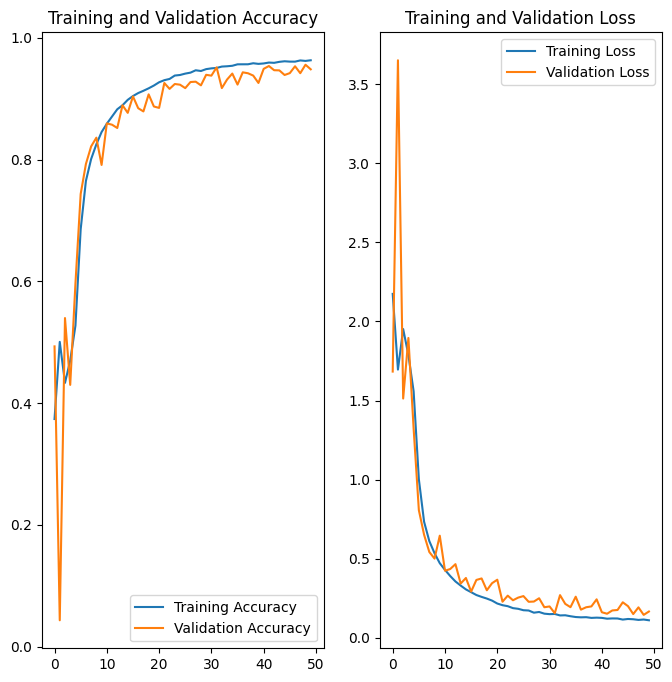

In [78]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.save("Desktop/models")

In [ ]:
import os
model_version = max([int(i) for i in (os.listdir("Desktop/models")+[0])]) + 1
model.save(f"Desktop/leafDetectionNew/leaf-detection-backend/models/{model_version}")